# 230968126 ML Week 4

Name :- Kewal Thacker Section :- A1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exercise 1

# Download fuel consumption dataset "FuelConsumption.csv", which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions

In [2]:
dataset = pd.read_csv("C:\\Users\\mca\\Desktop\\ML_Lab_4\\FuelConsumption.csv")
df = pd.DataFrame(dataset)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size. 

In [3]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

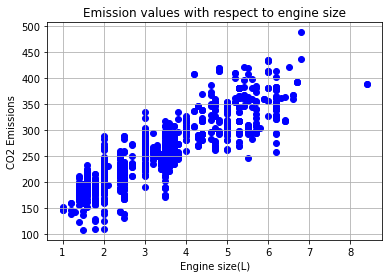

Correlation between emission values and engine size is:  0.8741543683958127


In [4]:
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color = 'blue')
plt.title("Emission values with respect to engine size")
plt.xlabel("Engine size(L)")
plt.ylabel("CO2 Emissions")
plt.grid(True)
plt.show()
print("Correlation between emission values and engine size is: ", df["ENGINESIZE"].corr(df["CO2EMISSIONS"]))

# Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.

In [5]:
from sklearn.model_selection import train_test_split
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best. 

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def polynomial_regression(degree, X_train, X_test, y_train, y_test):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly,y_train)
    
    y_pred = model.predict(X_test_poly)
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum((y_test - y_pred)**2)
    r2 = r2_score(y_test, y_pred)
    
    return mae,rss,r2,y_pred

degrees = [3,4,5]
results = {}

for degree in degrees:
    mae,rss,r2,y_pred = polynomial_regression(degree,X_train,X_test,y_train,y_test)
    results[degree] = {
        'MAE' : mae,
        'RSS' : rss,
        'R2' : r2
    }
    
for degree, metrics in results.items():
     print(f"Degree {degree} -> MAE: {metrics['MAE']}, RSS: {metrics['RSS']}, R2: {metrics['R2']}")

Degree 3 -> MAE: 10.230711579367128, RSS: 87722.8057834628, R2: 0.9322474349854077
Degree 4 -> MAE: 9.645980918147481, RSS: 82952.59886445031, R2: 0.935931696467094
Degree 5 -> MAE: 8.255203268238317, RSS: 74297.16373369654, R2: 0.9426167075789539


From the metrics, it can be inferred that the polynomial regression model with degree 5 is the best.

# Exercise 2

# Consider the 'HousePrice.csv' dataset which describes the features and sale price of a house. Build a regression model using regularization to predict the value of the properties.

In [7]:
dataset2 = pd.read_csv("C:\\Users\\mca\Desktop\\ML_Lab_4\\Housing.csv")
df = pd.DataFrame(dataset2)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# 1. Perform the preprocessing if required, scale the train and test data using standard scaler.
# 2. Split the dataset into train size of 70% and test size of 30% and Apply the Ridge and Lasso regression and fit the model containing all independent variables. 

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
X = df.drop('price', axis=1)  
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import Ridge,Lasso
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train_scaled, y_train)
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

# Make predictions on test data “HousePriceTest.csv” and tabulate performance of both models on unseen data.

In [14]:
ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Ridge Regression - MSE: {ridge_mse}, R2: {ridge_r2}")
print(f"Lasso Regression - MSE: {lasso_mse}, R2: {lasso_r2}")

Ridge Regression - MSE: 1534942765426.386, R2: 0.6435663436352572
Lasso Regression - MSE: 1535047819596.9312, R2: 0.6435419486917016


In [16]:
from sklearn.model_selection import cross_val_score

ridge_cv_score = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_score = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression - Average MSE (cross-validation): {-ridge_cv_score.mean()}")
print(f"Lasso Regression - Average MSE (cross-validation): {-lasso_cv_score.mean()}")

Ridge Regression - Average MSE (cross-validation): 2061614633543.1616
Lasso Regression - Average MSE (cross-validation): 2056324314846.827
